# End to End Machine Learning Project

## Supervised Learning Problem; Regression

Introduction ...

Topic: Predicting the fuel efficiency of vehicles

### Machine Learning Project Checklist

1. Define the problem from a high-level view
2. Identify the data sources and acquire the data
3. Initial exploration of the data
4. Exploratory data analysis
5. Data Preprocessing
6. Development of a baseline model
7. Exploration of other models to shortlist the best ones
8. Fine-tune of the shortlisted models
9. Document code and communicate your solution
10. Deploy the selected model in production and monitor results

### Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings('ignore')


### 1. Define the Problem from a high-level view 

**Problem Statement:**

The data contains the MPG(Mile Per Gallon) variable which is continuous data and tells us about the efficiency of fuel consumption of a vehicle in the 70s and 80s.

*Our aim here is to **predict the MPG value for a vehicle** given we have other attributes of that vehicle.*

### 2. Identify the Data Sources and acquire the Data

**Link to dataset:** http://archive.ics.uci.edu/ml/datasets/Auto+MPG

**Dataset information:** *The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes.*  (Quinlan, 1993)

**Dataset Attribute Information:**
1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)

Load the data using the *read_csv()* method from the pandas package:

In [2]:
# define the column names for dataframe import
cols = ['MPG','Cylinders','Displacement','Horsepower','Weight', 'Acceleration', 'Model Year', 'Origin']

# read the .data file using pandas package
df = pd.read_csv('./data/auto-mpg.data',  # data path
                 names=cols,              # name of data columns
                 na_values = "?",         # 
                 comment = '\t',          # 
                 sep= " ",                # data seperator 
                 skipinitialspace=True)

# Make a copy of the dataframe which will be used for further analysis. 
# The original dataframe "df" should stay static without any changes.
data = df.copy()

### 3. Initial Exploration of the Data

In [3]:
# show the first 10 rows of the dataframe
data.head(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
5,15.0,8,429.0,198.0,4341.0,10.0,70,1
6,14.0,8,454.0,220.0,4354.0,9.0,70,1
7,14.0,8,440.0,215.0,4312.0,8.5,70,1
8,14.0,8,455.0,225.0,4425.0,10.0,70,1
9,15.0,8,390.0,190.0,3850.0,8.5,70,1


In [4]:
# show randomly selected 10 rows of the dataframe
data.sample(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
61,21.0,4,122.0,86.0,2226.0,16.5,72,1
221,17.5,8,305.0,145.0,3880.0,12.5,77,1
44,13.0,8,400.0,175.0,5140.0,12.0,71,1
181,33.0,4,91.0,53.0,1795.0,17.5,75,3
99,18.0,6,232.0,100.0,2945.0,16.0,73,1
336,23.6,4,140.0,NaN,2905.0,14.3,80,1
141,29.0,4,98.0,83.0,2219.0,16.5,74,2
125,20.0,6,198.0,95.0,3102.0,16.5,74,1
130,26.0,4,122.0,80.0,2451.0,16.5,74,1
329,44.6,4,91.0,67.0,1850.0,13.8,80,3


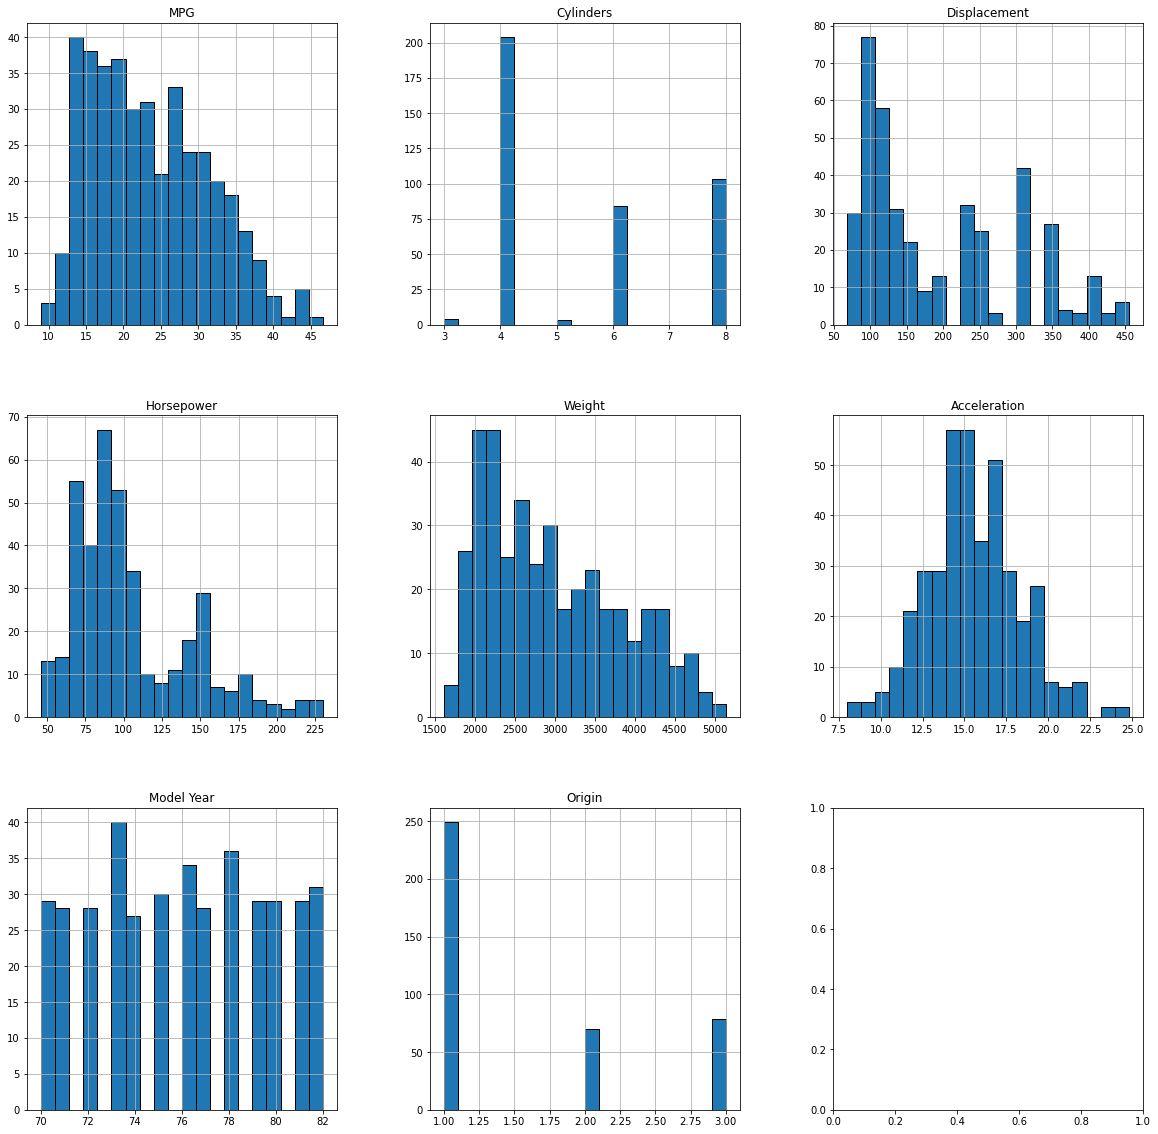

In [5]:
# plot histograms of all dataset columns to get a first overview of the data
fig, ax = plt.subplots(3, 3, figsize=(20,20))
plt.rc('axes', axisbelow=True)
m=0
for i in range(3):
    for j in range(3):
        if i == 2 and j == 2:
            break
        data.hist(column = df.columns[m], bins = 20, ax=ax[i,j], edgecolor='black')
        ax[i,j].grid(zorder=0)
        m+=1 
plt.show()

The histogram shows us that the dataset contains two categorial columns. These are the *Cylinders* column which contains 5 categories (3, 4, 5, 6, 8) for the number of cylinders in the motor and the *Origin* column which contains 3 categories (1, 2, 3) for the country code of the vehicle.

### 4. Exploratory Data Analysis

1. Check for Data type of columns
2. Check for null values.
3. Check for outliers
4. Look for the category distribution in categorical columns
5. Plot for correlation
6. Look for new variables

#### 4.1. Check for Data type of columns

First lets check the dataframe info using the *info()* method on the pandas dataframe

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


As we can see, the dataframe contains 5 columns of the datatype float64 and 3 columns of the datatype int64.

On the second step, lets check the statistical dataset properties of the dataset using the *describe()* method:

In [7]:
data.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


#### 4.2. Check for null values

All columns but the *Horsepower* column contain in total 398 values (see *count* row). The *Horsepower* column contains 6 values less. Lets see if the *horsepower* column has any missing values. To do so, we can check for null values within the given dataframe.

In [8]:
data.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

As we can see, the *Horsepower* column of the dataframe has 6 missing values. To replace the missing values we can use the median of the column by using the pandas *median()* method.


In [9]:
# substitute the missing values (outliers) with the median of the column
median = data['Horsepower'].median()
data['Horsepower'] = data['Horsepower'].fillna(median)

Lets check if the substitution has worked

In [10]:
data.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


#### 4.3. Check for outliers

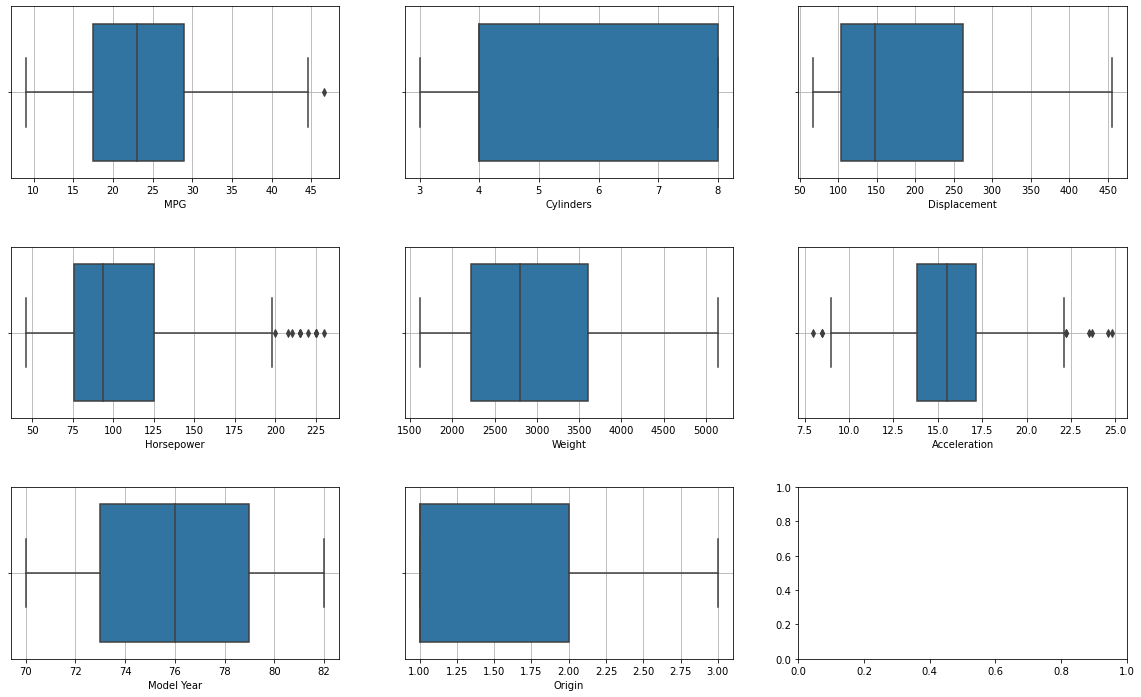

In [11]:
# plot histograms of all dataset columns to get a first overview of the data
fig, ax = plt.subplots(3, 3, figsize=(20,12))
plt.rc('axes', axisbelow=True)
fig.subplots_adjust(hspace=0.4)
m=0
for i in range(3):
    for j in range(3):
        if i == 2 and j == 2:
            break
        sns.boxplot(x=data[df.columns[m]], ax=ax[i,j])
        ax[i,j].grid(zorder=0)
        m+=1 
plt.show()

The dataframe columns *MPG*, *Acceleration* and *Horsepower* have outliers, as it can be seen in the boxplot visualization. The *MPG* column contains only one outlier. But the *Horsepower* and *Acceleration* columns contain several outliers which could distort the results of the MPG estimation. 

The outliers in the dataset could be substituted with the median of the dataset to improve the results of the following estimation problem.

#### 4.4. Look for the category distribution in categorical columns

The 2 categorical columns are *Cylinders* and *Origin* which only have a few categories of values. Looking at the distribution of the values among these categories will tell us how the data is distributed:

4    0.512563
8    0.258794
6    0.211055
3    0.010050
5    0.007538
Name: Cylinders, dtype: float64

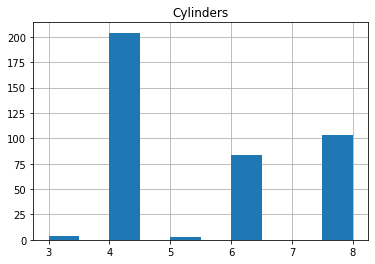

In [12]:
# plot a histogram of the Cylinders columns
data.hist('Cylinders')

# calculate the category distribution for the Cylinders column
data['Cylinders'].value_counts() / len(data)

1    0.625628
3    0.198492
2    0.175879
Name: Origin, dtype: float64

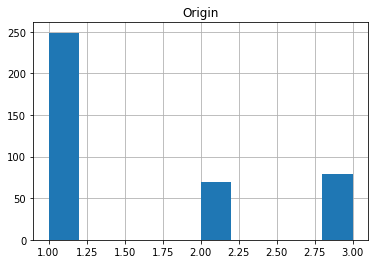

In [13]:
# plot a histogram of the Origin columns
data.hist('Origin')

# calculate the category distribution for the Origin column
data['Origin'].value_counts() / len(data)

#### 4.5. Plot for Correlation of selected Dataset columns

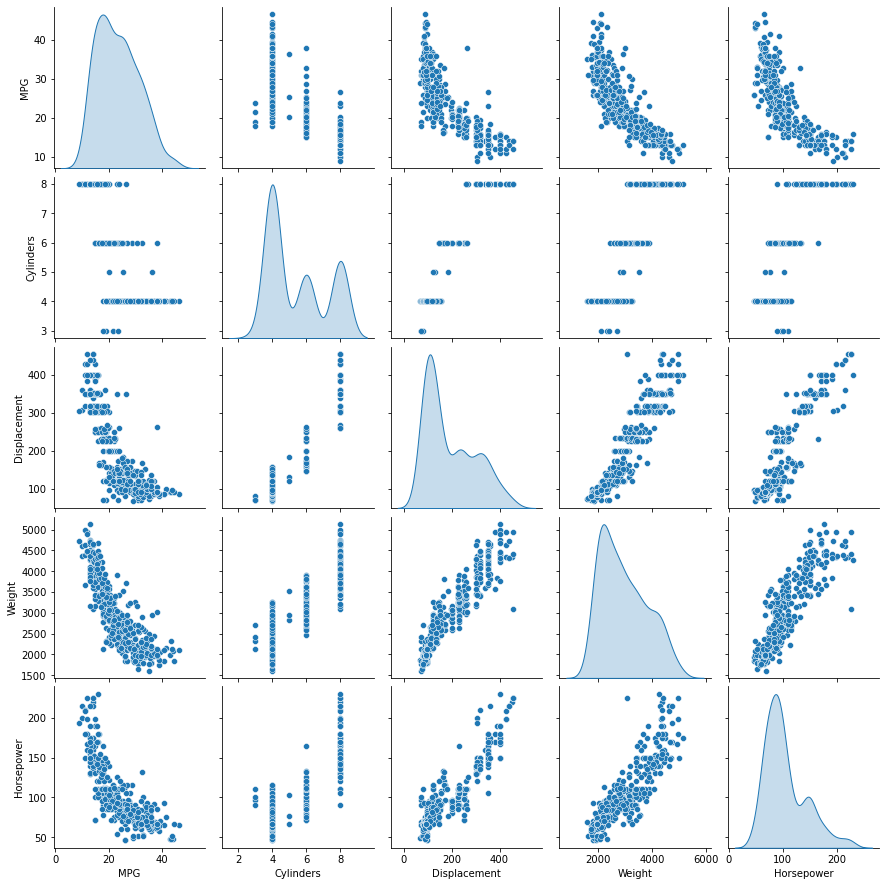

In [14]:
# pairplots to get an intuition of potential correlations
sns.pairplot(data[["MPG", "Cylinders", "Displacement", "Weight", "Horsepower"]], diag_kind="kde")

The pair plot gives a brief overview of how each variable behaves with respect to every other variable.
For example, the MPG column (our target variable) is negatively correlated with Displacement, weight, and horsepower features.

In [15]:
corr_matrix = data.corr()
corr_matrix['MPG'].sort_values(ascending=False)

MPG             1.000000
Model Year      0.579267
Origin          0.563450
Acceleration    0.420289
Horsepower     -0.773453
Cylinders      -0.775396
Displacement   -0.804203
Weight         -0.831741
Name: MPG, dtype: float64

#### 4.6. Testing for new variables — Analyze the correlation of each variable with the target variable

1. Displacement on Horsepower
2. Weight on Cylinder
3. Acceleration on Horsepower
4. Acceleration on Cylinder

In [16]:
# test new variables by checking their correlation w.r.t. MPG
data['Displacement_on_Horsepower'] = data['Displacement'] / data['Horsepower']
data['Weight_on_Cylinder'] = data['Weight'] / data['Cylinders']
data['Acceleration_on_Horsepower'] = data['Acceleration'] / data['Horsepower']
data['Acceleration_on_Cylinder'] = data['Acceleration'] / data['Cylinders']
corr_matrix = data.corr()
corr_matrix['MPG'].sort_values(ascending=False)

MPG                           1.000000
Acceleration_on_Cylinder      0.732133
Acceleration_on_Horsepower    0.704240
Model Year                    0.579267
Origin                        0.563450
Acceleration                  0.420289
Weight_on_Cylinder           -0.020778
Displacement_on_Horsepower   -0.577236
Horsepower                   -0.773453
Cylinders                    -0.775396
Displacement                 -0.804203
Weight                       -0.831741
Name: MPG, dtype: float64

The new features *Acceleration_on_Cylinder* and *Acceleration_on_Horsepower* have a stronger positive correlation to the main feature *MPG* than the unedited features. Therefore the new created variables offer added value for the analysis. 

This brings us to the end of the Exploratory Analysis. We are ready to proceed to our next step of preparing the data for our Machine Learning.

### 5. Data Preparing

#### 5.1. Split data into training and test set

This is one of the first things we should do as we want to test our final model on unseen/unbiased data.

There are many ways to split the data into training and testing sets but we want our test set to represent the overall population and not just a few specific categories. Thus, instead of using simple and common train_test_split() method from sklearn, we use stratified sampling.

*Stratified Sampling — We create homogeneous subgroups called strata from the overall population and sample the right number of instances to each stratum to ensure that the test set is representative of the overall population.*

In task 4, we saw how the data is distributed over each category of the Cylinder column. We’re using the Cylinder column to create the strata:

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["Cylinders"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

Checking for the distribution in training set:

In [18]:
# check for cylinder category distribution in training set
strat_train_set['Cylinders'].value_counts() / len(strat_train_set)

4    0.512579
8    0.257862
6    0.210692
5    0.009434
3    0.009434
Name: Cylinders, dtype: float64

Checking for the distribution in test set:

In [19]:
# check for cylinder category distribution in test set
strat_test_set["Cylinders"].value_counts() / len(strat_test_set)

4    0.5125
8    0.2625
6    0.2125
3    0.0125
Name: Cylinders, dtype: float64

You can compare these results with the output of train_test_split() to find out which one produces better splits.

In [20]:
from sklearn.model_selection import train_test_split

tts_train_set, tts_test_set = train_test_split(data, test_size=0.33, shuffle=True, random_state=42)

In [21]:
tts_train_set['Cylinders'].value_counts() / len(tts_train_set)

4    0.492481
8    0.259398
6    0.225564
5    0.011278
3    0.011278
Name: Cylinders, dtype: float64

In [22]:
tts_test_set['Cylinders'].value_counts() / len(tts_test_set)

4    0.553030
8    0.257576
6    0.181818
3    0.007576
Name: Cylinders, dtype: float64

Lets create a grouped bar chart to compare the output distribution of the *StratifiedShuffleSplit()* and *train_test_split()* method for feature *Cylinders*, both for the training set and the test set. The distribution of the split functions are compared to the base distribution of the dataset feature *Cylinders*.

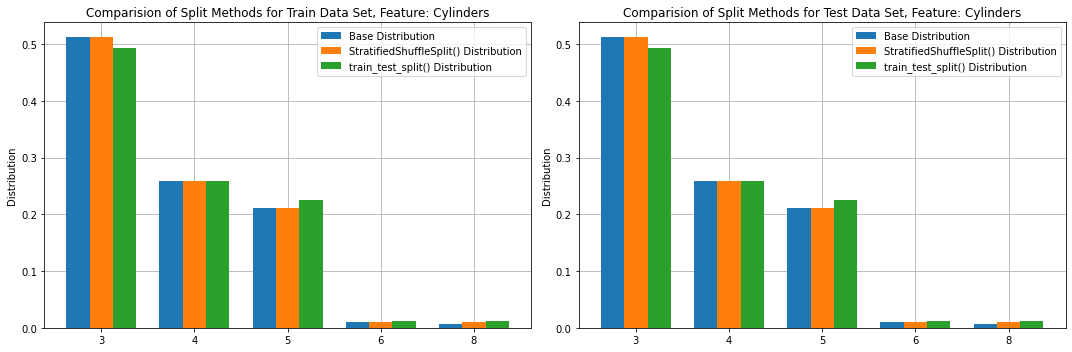

In [23]:
# calculate the distribution the train and the test set, both using StratifiedShuffleSplit() and train_test_split() method
dist_strat_train = strat_train_set['Cylinders'].value_counts() / len(strat_train_set)
dist_tts_train = tts_train_set['Cylinders'].value_counts() / len(tts_train_set)
dist_base = data['Cylinders'].value_counts() / len(data)

dist_strat_test = strat_train_set['Cylinders'].value_counts() / len(strat_train_set)
dist_tts_test = tts_train_set['Cylinders'].value_counts() / len(tts_train_set)

# create labels for grouped bar plot and set bar width
labels = ['3', '4', '5', '6', '8']
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(1, 2, figsize=(15,5))

# left plot: comparison of train set distribution for column 'Cyclinder'
ax[0].bar(x - width, dist_base, width, label='Base Distribution')
ax[0].bar(x , dist_strat_train, width, label='StratifiedShuffleSplit() Distribution')
ax[0].bar(x + width, dist_tts_train, width, label='train_test_split() Distribution')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax[0].set_ylabel('Distribution')
ax[0].set_title('Comparision of Split Methods for Train Data Set, Feature: Cylinders')
ax[0].set_xticks(x)
ax[0].set_xticklabels(labels)
ax[0].grid()
ax[0].legend()

# right plot: comparison of test set distribution for column 'Cyclinder'
ax[1].bar(x - width, dist_base, width, label='Base Distribution')
ax[1].bar(x , dist_strat_test, width, label='StratifiedShuffleSplit() Distribution')
ax[1].bar(x + width, dist_tts_test, width, label='train_test_split() Distribution')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax[1].set_ylabel('Distribution')
ax[1].set_title('Comparision of Split Methods for Test Data Set, Feature: Cylinders')
ax[1].set_xticks(x)
ax[1].set_xticklabels(labels)
ax[1].grid()
ax[1].legend()

fig.tight_layout()
plt.show()

As we can see, the *StratifiedShuffleSplit()* method provides better results.

In [24]:
# for the rest of the this project, we will use the stratisfied split for our train and test data
train_set = strat_train_set
test_set = strat_test_set

#### 5.2. Segregate Target and Feature variables

In [25]:
# we will seperate the target feature (MPG) from other features of the data set
# the target feature will be used as label for following machine learning algorithms
data = strat_train_set.drop("MPG", axis=1)
data_labels = strat_train_set["MPG"].copy()
data

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Displacement_on_Horsepower,Weight_on_Cylinder,Acceleration_on_Horsepower,Acceleration_on_Cylinder
145,4,83.0,61.0,2003.0,19.0,74,3,1.360656,500.750000,0.311475,4.750000
151,4,79.0,67.0,2000.0,16.0,74,2,1.179104,500.000000,0.238806,4.000000
388,4,156.0,92.0,2585.0,14.5,82,1,1.695652,646.250000,0.157609,3.625000
48,6,250.0,88.0,3139.0,14.5,71,1,2.840909,523.166667,0.164773,2.416667
114,4,98.0,90.0,2265.0,15.5,73,2,1.088889,566.250000,0.172222,3.875000
...,...,...,...,...,...,...,...,...,...,...,...
147,4,90.0,75.0,2108.0,15.5,74,2,1.200000,527.000000,0.206667,3.875000
156,8,400.0,170.0,4668.0,11.5,75,1,2.352941,583.500000,0.067647,1.437500
395,4,135.0,84.0,2295.0,11.6,82,1,1.607143,573.750000,0.138095,2.900000
14,4,113.0,95.0,2372.0,15.0,70,3,1.189474,593.000000,0.157895,3.750000


#### 5.3. Convert the Origin Column from int to string 

The *Origin* column describes the origin of the vehicle and has discrete values that look like the code of a country. 

We will convert the values of the *Origin* column into strings to make the origin more explicit and easier to analyse.

In [26]:
# converte integer classes to countries in Origin column
train_set['Origin'] = train_set['Origin'].map({1: 'India', 2: 'USA', 3 : 'Germany'})
train_set.sample(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Displacement_on_Horsepower,Weight_on_Cylinder,Acceleration_on_Horsepower,Acceleration_on_Cylinder
170,23.0,4,140.0,78.0,2592.0,18.5,75,India,1.794872,648.000000,0.237179,4.625000
145,32.0,4,83.0,61.0,2003.0,19.0,74,Germany,1.360656,500.750000,0.311475,4.750000
37,18.0,6,232.0,100.0,3288.0,15.5,71,India,2.320000,548.000000,0.155000,2.583333
293,31.9,4,89.0,71.0,1925.0,14.0,79,USA,1.253521,481.250000,0.197183,3.500000
168,23.0,4,140.0,83.0,2639.0,17.0,75,India,1.686747,659.750000,0.204819,4.250000
56,26.0,4,91.0,70.0,1955.0,20.5,71,India,1.300000,488.750000,0.292857,5.125000
319,31.3,4,120.0,75.0,2542.0,17.5,80,Germany,1.600000,635.500000,0.233333,4.375000
10,15.0,8,383.0,170.0,3563.0,10.0,70,India,2.252941,445.375000,0.058824,1.250000
134,16.0,6,258.0,110.0,3632.0,18.0,74,India,2.345455,605.333333,0.163636,3.000000
82,23.0,4,120.0,97.0,2506.0,14.5,72,Germany,1.237113,626.500000,0.149485,3.625000


We’ll have to preprocess this categorical column by one-hot encoding these values:

In [27]:
# one hot encoding of the Origin column
train_set = pd.get_dummies(train_set, prefix='', prefix_sep='')
train_set.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Displacement_on_Horsepower,Weight_on_Cylinder,Acceleration_on_Horsepower,Acceleration_on_Cylinder,Germany,India,USA
145,32.0,4,83.0,61.0,2003.0,19.0,74,1.360656,500.750000,0.311475,4.750000,1,0,0
151,31.0,4,79.0,67.0,2000.0,16.0,74,1.179104,500.000000,0.238806,4.000000,0,0,1
388,26.0,4,156.0,92.0,2585.0,14.5,82,1.695652,646.250000,0.157609,3.625000,0,1,0
48,18.0,6,250.0,88.0,3139.0,14.5,71,2.840909,523.166667,0.164773,2.416667,0,1,0
114,26.0,4,98.0,90.0,2265.0,15.5,73,1.088889,566.250000,0.172222,3.875000,0,0,1


#### 5.4. Scale the data set

Example of min max scaling (scaling values between given range) and standard scaling (scaling mean-free)

In [28]:
scaler1 = MinMaxScaler(feature_range=(0,1))
scaler2 = StandardScaler()
Horsepower_MinMax = scaler1.fit_transform(df[['Horsepower']])
Horsepower_Standard = scaler2.fit_transform(df[['Horsepower']])

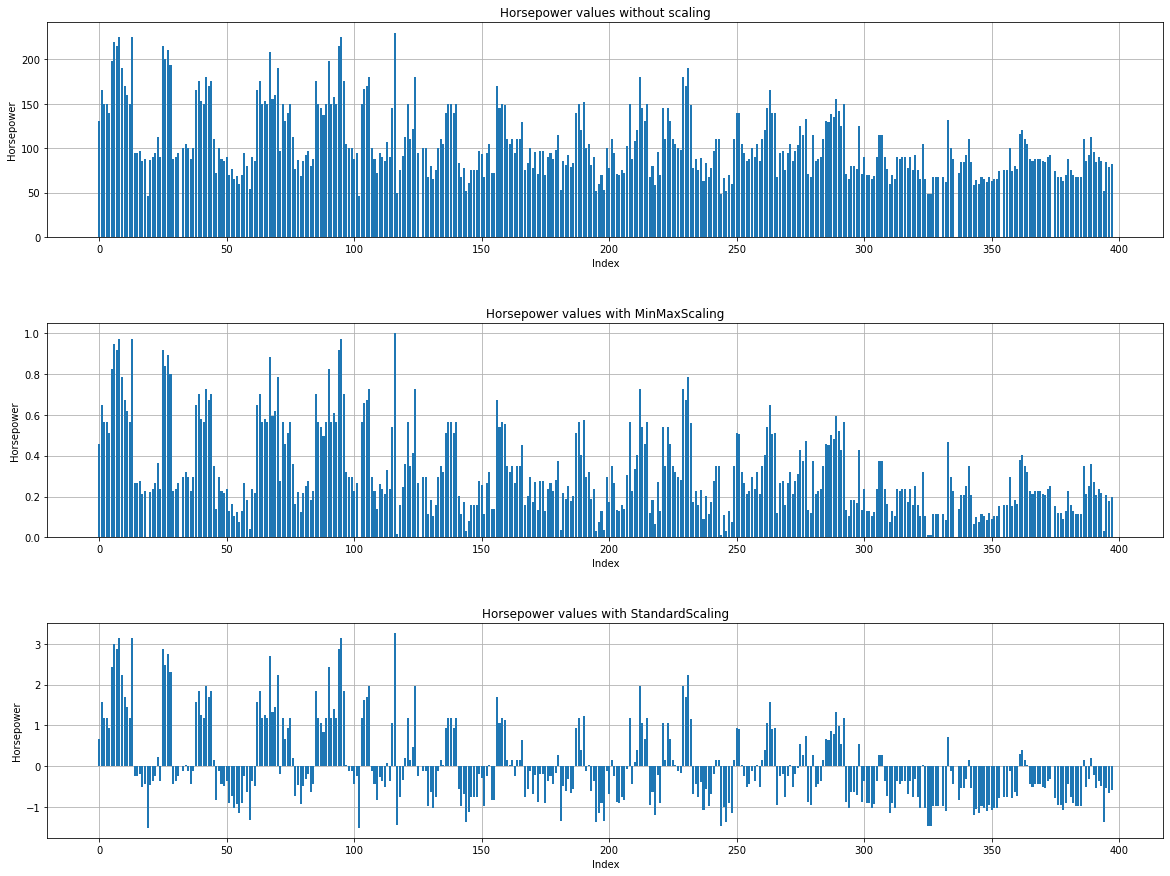

In [29]:
fig, ax = plt.subplots(3, 1, figsize=(20,15))
fig.subplots_adjust(hspace=0.4)
ax[0].bar(x = df.index.values, height = df['Horsepower'])
ax[0].set(xlabel='Index', ylabel='Horsepower', title='Horsepower values without scaling')
ax[0].grid()
ax[1].bar(x = df.index.values, height = Horsepower_MinMax.flatten())
ax[1].set(xlabel='Index', ylabel='Horsepower', title='Horsepower values with MinMaxScaling')
ax[1].grid()
ax[2].bar(x = df.index.values, height = Horsepower_Standard.flatten())
ax[2].set(xlabel='Index', ylabel='Horsepower', title='Horsepower values with StandardScaling')
ax[2].grid()

plt.show()

### 6. Data Preprocessing using Sklearn

One of the important aspects of Data Preparation is that we have to keep automating our steps in the form of functions and classes so that it is easier for us to integrate the methods and pipelines into the main product.
Here are the major tasks to prepare the data and encapsulate functionalities:

1. Handling Categorical Attribute - OneHotEncoder
2. Data Cleaning - Imputer
3. Attribute Addition - Adding custom transformation
4. Setting up Data Transformation Pipeline for numerical and categorical column.

For 1) we will use the *OneHotEncoder()* method from the sklearn.preprocessing package. 
For 2) we will use the *SimpleImputer()* method from the sklearn.impute package. 
For 3) we will the the *BaseEstimator* und *TransformerMixin* classes from the sklearn.base package. 
In 4) we will combine all above meantioned methods and classes to create a data transformation pipeline.

In [48]:
# preprocess the Origin column in data
def preprocess_origin_cols(df):
    # only preprocess the Origin column if it contains numerical data (if it hasnt been transformed yet)
    if type(data['Origin'][0]) == np.int64:
        df["Origin"] = df["Origin"].map({1: "India", 2: "USA", 3: "Germany"})
    return df

# creating custom attribute adder class
acc_ix, hpower_ix, cyl_ix = 4, 2, 0  # column indicez
class CustomAttrAdder(BaseEstimator, TransformerMixin):
    def __init__(self, acc_on_power=True): # no *args or **kargs
        self.acc_on_power = acc_on_power
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        acc_on_cyl = X[:, acc_ix] / X[:, cyl_ix]
        if self.acc_on_power:
            acc_on_power = X[:, acc_ix] / X[:, hpower_ix]
            return np.c_[X, acc_on_power, acc_on_cyl]
        
        return np.c_[X, acc_on_cyl]
    
def num_pipeline_transformer(data):
    '''
    Function to process numerical transformations
    Argument:
        data: original dataframe 
    Returns:
        num_attrs: numerical dataframe
        num_pipeline: numerical pipeline object
        
    '''
    numerics = ['float64', 'int64']

    num_attrs = data.select_dtypes(include=numerics)

    num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attrs_adder', CustomAttrAdder()),
        ('std_scaler', StandardScaler()),
        ])
    return num_attrs, num_pipeline


def pipeline_transformer(data):
    '''
    Complete transformation pipeline for both
    nuerical and categorical data.
    
    Argument:
        data: original dataframe 
    Returns:
        prepared_data: transformed data, ready to use
    '''
    cat_attrs = ["Origin"]
    num_attrs, num_pipeline = num_pipeline_transformer(data)
    full_pipeline = ColumnTransformer([
        ("num", num_pipeline, list(num_attrs)),
        ("cat", OneHotEncoder(), cat_attrs),
        ])
    prepared_data = full_pipeline.fit_transform(data)
    return prepared_data

### Testing of the data preprocessing pipeline 

In [49]:
data = df.copy()

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["Cylinders"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]
    
# segregate the feature and target variable
data = strat_train_set.drop("MPG", axis=1)
data_labels = strat_train_set["MPG"].copy()
data

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
145,4,83.0,61.0,2003.0,19.0,74,3
151,4,79.0,67.0,2000.0,16.0,74,2
388,4,156.0,92.0,2585.0,14.5,82,1
48,6,250.0,88.0,3139.0,14.5,71,1
114,4,98.0,90.0,2265.0,15.5,73,2
...,...,...,...,...,...,...,...
147,4,90.0,75.0,2108.0,15.5,74,2
156,8,400.0,170.0,4668.0,11.5,75,1
395,4,135.0,84.0,2295.0,11.6,82,1
14,4,113.0,95.0,2372.0,15.0,70,3


In [50]:
# transform Origin column from int to string
preprocessed_df = preprocess_origin_cols(data)
preprocessed_df

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
145,4,83.0,61.0,2003.0,19.0,74,Germany
151,4,79.0,67.0,2000.0,16.0,74,USA
388,4,156.0,92.0,2585.0,14.5,82,India
48,6,250.0,88.0,3139.0,14.5,71,India
114,4,98.0,90.0,2265.0,15.5,73,USA
...,...,...,...,...,...,...,...
147,4,90.0,75.0,2108.0,15.5,74,USA
156,8,400.0,170.0,4668.0,11.5,75,India
395,4,135.0,84.0,2295.0,11.6,82,India
14,4,113.0,95.0,2372.0,15.0,70,Germany


In [51]:
# do OneHotEncoding
# do Imputing
# do Feature Transformation
# do Scaling
prepared_data = pipeline_transformer(preprocessed_df)
prepared_data_df = pd.DataFrame(prepared_data, columns=['Cylinders','Displacement','Horsepower','Weight','Acceleration','Model Year','acc_on_power','acc_on_cyl','Germany','India','USA'])
prepared_data_df

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,acc_on_power,acc_on_cyl,Germany,India,USA
0,-0.856578,-1.078045,-1.151930,-1.172203,1.215869,-0.544364,1.709527,1.295655,1.0,0.0,0.0
1,-0.856578,-1.117458,-0.990035,-1.175813,0.130698,-0.544364,0.798675,0.666186,0.0,0.0,1.0
2,-0.856578,-0.358749,-0.315474,-0.471828,-0.411887,1.636520,-0.219068,0.351451,0.0,1.0,0.0
3,0.322607,0.567467,-0.423404,0.194851,-0.411887,-1.362195,-0.129273,-0.662693,0.0,1.0,0.0
4,-0.856578,-0.930244,-0.369439,-0.856914,-0.050164,-0.816974,-0.035899,0.561274,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
313,-0.856578,-1.009071,-0.774176,-1.045847,-0.050164,-0.544364,0.395834,0.561274,0.0,0.0,1.0
314,1.501793,2.045472,1.789157,2.034839,-1.497058,-0.271753,-1.346665,-1.484500,0.0,1.0,0.0
315,-0.856578,-0.565670,-0.531334,-0.820812,-1.460886,1.636520,-0.463653,-0.257035,0.0,1.0,0.0
316,-0.856578,-0.782444,-0.234527,-0.728151,-0.231025,-1.634806,-0.215483,0.456363,1.0,0.0,0.0


### 7. Selecting and Training Machine Learning Models

1. Linear Regression
2. Decision Tree
3. Random Forest
4. SVM regressor

#### 7.1. Linear Regression 

In [61]:
from sklearn.linear_model import LinearRegression

# select model
lin_reg = LinearRegression()

# fit model to train data
lin_reg.fit(prepared_data, data_labels)

LinearRegression()

In [65]:
# calculate mean squared error of linear regression model
from sklearn.metrics import mean_squared_error

mpg_predictions = lin_reg.predict(prepared_data)
lin_reg_mse = mean_squared_error(data_labels, mpg_predictions)
lin_reg_rmse = np.sqrt(lin_reg_mse)
lin_reg_rmse

2.959040222576087

In [93]:
# testing the predictions
sample_data = data.iloc[:5]
sample_labels = data_labels.iloc[:5]

sample_data_prepared = pipeline_transformer(sample_data)
lin_reg_predicted = lin_reg.predict(sample_data_prepared)

print("Prediction of MPG of test data samples: ", list(np.round(lin_reg_predicted,1)))
list_sample_labels = list(sample_labels)
print("Actual MPG Labels of test data samples: ", list_sample_labels)

Prediction of MPG of test data samples:  [29.1, 27.8, 26.1, 12.7, 22.2]
Actual MPG Labels of test data samples:  [32.0, 31.0, 26.0, 18.0, 26.0]


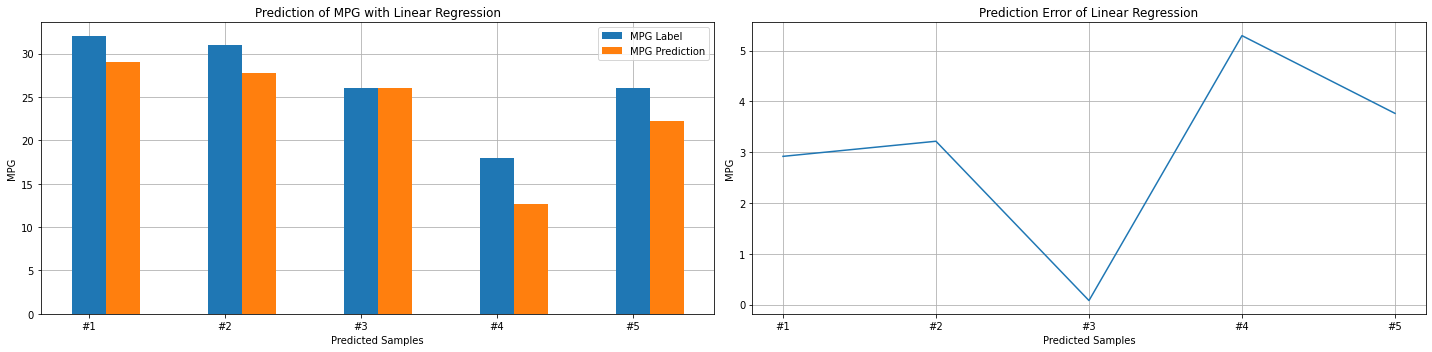

In [68]:
# create labels for grouped bar plot and set bar width
labels = ['#1', '#2', '#3', '#4', '#5']
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(1, 2, figsize=(20,5))

# left plot: comparison of train set distribution for column 'Cyclinder'
ax[0].bar(x , sample_labels, width, label='MPG Label')
ax[0].bar(x + width, lin_reg_predicted, width, label='MPG Prediction')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax[0].set_ylabel('MPG')
ax[0].set_xlabel('Predicted Samples')
ax[0].set_title('Prediction of MPG with Linear Regression')
ax[0].set_xticks(x)
ax[0].set_xticklabels(labels)
ax[0].grid()
ax[0].legend()

# left plot: comparison of train set distribution for column 'Cyclinder'
ax[1].plot(np.abs(list_sample_labels-lin_reg_predicted))
# Add some text for labels, title and custom x-axis tick labels, etc.
ax[1].set_ylabel('MPG')
ax[1].set_xlabel('Predicted Samples')
ax[1].set_title('Prediction Error of Linear Regression')
ax[1].set_xticks(x)
ax[1].set_xticklabels(labels)
ax[1].grid()

fig.tight_layout()
plt.show()

#### 7.2. Decision Tree Regressor

In [82]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=5, criterion='mse')
tree_reg.fit(prepared_data, data_labels)

DecisionTreeRegressor(max_depth=5)

In [83]:
mpg_predictions = tree_reg.predict(prepared_data)
tree_mse = mean_squared_error(data_labels, mpg_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

2.042746124550049

In [92]:
# testing the predictions
sample_data = data.iloc[:5]
sample_labels = data_labels.iloc[:5]

sample_data_prepared = pipeline_transformer(sample_data)
tree_reg_predicted = tree_reg.predict(sample_data_prepared)

print("Prediction of MPG of test data samples: ", list(np.round(tree_reg_predicted,1)))
list_sample_labels = list(sample_labels)
print("Actual MPG Labels of test data samples: ", list_sample_labels)

Prediction of MPG of test data samples:  [25.4, 30.2, 26.2, 14.1, 22.5]
Actual MPG Labels of test data samples:  [32.0, 31.0, 26.0, 18.0, 26.0]


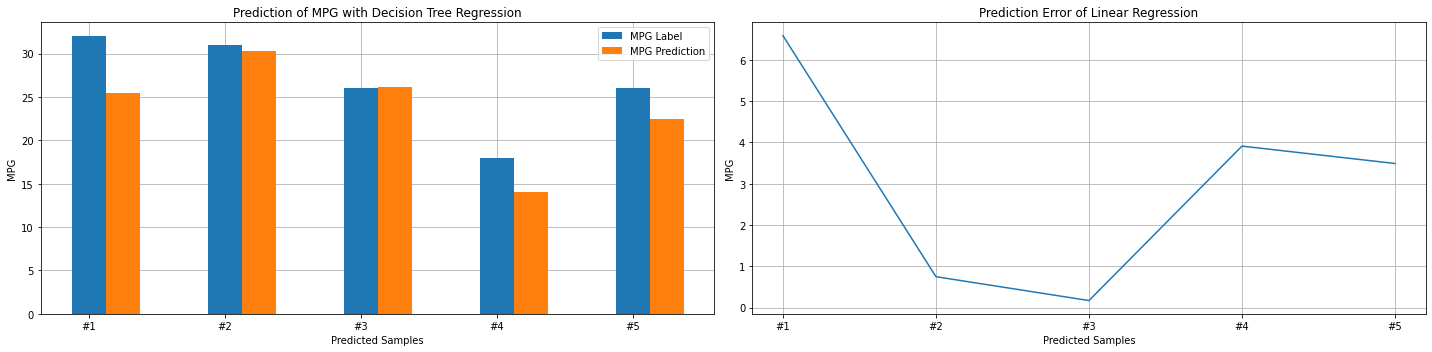

In [85]:
# create labels for grouped bar plot and set bar width
labels = ['#1', '#2', '#3', '#4', '#5']
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(1, 2, figsize=(20,5))

# left plot: comparison of train set distribution for column 'Cyclinder'
ax[0].bar(x , sample_labels, width, label='MPG Label')
ax[0].bar(x + width, tree_reg_predicted, width, label='MPG Prediction')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax[0].set_ylabel('MPG')
ax[0].set_xlabel('Predicted Samples')
ax[0].set_title('Prediction of MPG with Decision Tree Regression')
ax[0].set_xticks(x)
ax[0].set_xticklabels(labels)
ax[0].grid()
ax[0].legend()

# left plot: comparison of train set distribution for column 'Cyclinder'
ax[1].plot(np.abs(list_sample_labels-tree_reg_predicted))
# Add some text for labels, title and custom x-axis tick labels, etc.
ax[1].set_ylabel('MPG')
ax[1].set_xlabel('Predicted Samples')
ax[1].set_title('Prediction Error of Decision Tree Regression')
ax[1].set_xticks(x)
ax[1].set_xticklabels(labels)
ax[1].grid()

fig.tight_layout()
plt.show()

#### 7.3. Random Forest Regressor

In [87]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(prepared_data, data_labels)

2.560528156603339

In [88]:
mpg_predictions = forest_reg.predict(prepared_data)
forest_mse = mean_squared_error(data_labels, mpg_predictions)
forest_rmse = np.sqrt(tree_mse)
forest_rmse

2.042746124550049

In [94]:
# testing the predictions
sample_data = data.iloc[:5]
sample_labels = data_labels.iloc[:5]

sample_data_prepared = pipeline_transformer(sample_data)
forest_reg_predicted = forest_reg.predict(sample_data_prepared)

print("Prediction of MPG of test data samples: ", list(np.round(forest_reg_predicted,1)))
list_sample_labels = list(sample_labels)
print("Actual MPG Labels of test data samples: ", list_sample_labels)

Prediction of MPG of test data samples:  [26.8, 27.2, 23.5, 14.1, 23.4]
Actual MPG Labels of test data samples:  [32.0, 31.0, 26.0, 18.0, 26.0]


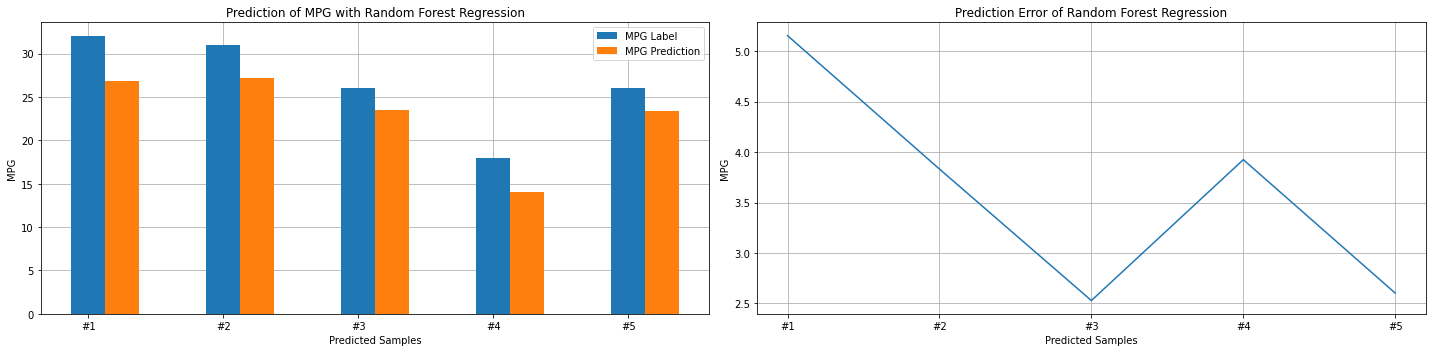

In [95]:
# create labels for grouped bar plot and set bar width
labels = ['#1', '#2', '#3', '#4', '#5']
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(1, 2, figsize=(20,5))

# left plot: comparison of train set distribution for column 'Cyclinder'
ax[0].bar(x , sample_labels, width, label='MPG Label')
ax[0].bar(x + width, forest_reg_predicted, width, label='MPG Prediction')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax[0].set_ylabel('MPG')
ax[0].set_xlabel('Predicted Samples')
ax[0].set_title('Prediction of MPG with Random Forest Regression')
ax[0].set_xticks(x)
ax[0].set_xticklabels(labels)
ax[0].grid()
ax[0].legend()

# left plot: comparison of train set distribution for column 'Cyclinder'
ax[1].plot(np.abs(list_sample_labels-forest_reg_predicted))
# Add some text for labels, title and custom x-axis tick labels, etc.
ax[1].set_ylabel('MPG')
ax[1].set_xlabel('Predicted Samples')
ax[1].set_title('Prediction Error of Random Forest Regression')
ax[1].set_xticks(x)
ax[1].set_xticklabels(labels)
ax[1].grid()

fig.tight_layout()
plt.show()